In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
veri=pd.read_csv("municipality_bus_utilization.csv") #veriyi okudum

veri.info()    #boş verileri gözden geçirdim ve veri setindeki null verileri kontrol ettim

#timestamp sütununu işime yarayabileceğini düşündüğüm şekilde parçalamak ve değişkenlere atamak için fonksiyon oluşturdum.
time=[]
per=[]
date=[]
def Split(text):
    tme=str(text).split(" ")[1]
    dte=str(text).split(" ")[0]
    tme=tme.split("'")[0]
    dte=dte.split("'")[1]
    dte_split=[int(dte.split('-')[0]),int(dte.split('-')[1]),int(dte.split('-')[2])]
    if int(tme.split(":")[1])>50:
        clock=int(tme.split(":")[0])+1
    
    elif int(tme.split(":")[1])<10:
        clock=int(tme.split(":")[0])    
    
    else:
        clock=int(tme.split(":")[0])+0.5
    time.append(tme)
    per.append(clock)
    date.append(dte_split)
   



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        13070 non-null  object
 1   municipality_id  13070 non-null  int64 
 2   usage            13070 non-null  int64 
 3   total_capacity   13070 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 408.6+ KB


In [39]:
timestamp=np.array(veri[["timestamp"]]).tolist()

time_stamp=list(map(Split,timestamp))

#verilen verileri  aralarındaki ilişkiyi incelemek için parçalarına ayırdım
bus_name=np.array(veri[["municipality_id"]])
bus_name=bus_name.reshape(1,-1)[0,:].tolist()
usage=np.array(veri[["usage"]])
usage=usage.reshape(1,-1)[0,:].tolist()
capacity=np.array(veri[["total_capacity"]])
capacity=capacity.reshape(1,-1)[0,:].tolist()

week_day=[]
#verilen tarih değerlerinden haftanın günlerini encode halde aldım bu sayede öğrenme metodumda direk olarak kullanabileceğim.

for k in range(len(date)):
    w=datetime.date(date[k][0],date[k][1],date[k][2]).weekday()
    week_day.append(w)

#ilerde ihtiyacım olacağından otobüslerin kapasitelerini ve idlerini içeren bir tablo oluşturuyorum ve sıralıyorum.    
capacity_list=[]
for t in range(10):
    capacity_data=[bus_name[t],capacity[t]]
    capacity_list.append(capacity_data)
    capacity_list.sort()
    

In [40]:
len(bus_name)





13070

In [41]:
#Verilen otobüsün periyodlara göre kullanımını incelemek için küçük bir fonksiyon yazdım.
    
def Interest(bus_id):
    plot_data_per=[]
    plot_data_usage=[]
    plot_data_capacity=[]
    for i in range(180) :
        if int(bus_id)==bus_name[i]:
             plot_data_per.append(per[i])
             plot_data_usage.append(usage[i])
             plot_data_capacity.append(capacity[i])
             
        
        time_stamp=date[i]
        
        
    mp.scatter(plot_data_per,plot_data_usage)
    mp.plot (plot_data_per,plot_data_capacity,"r--")
    mp.xticks(plot_data_per, rotation=45)
    
    mp.ylabel("Usage")
    mp.title(f"{time_stamp}")
    mp.show()



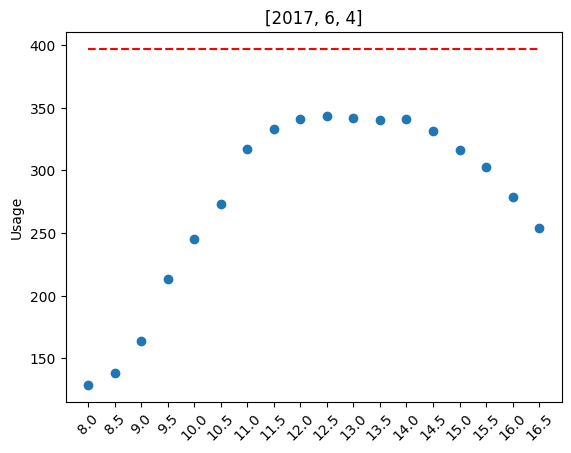

In [42]:
Interest(1)

In [43]:
#incelemek için dağıttığım veriyi toparlayı test ve train için ayırıyorum
df_busname=pd.DataFrame(bus_name,columns=["bus_id"])

df_per=pd.DataFrame(per,columns=["period"])
df_week=pd.DataFrame(week_day,columns=["week_day"])
df_usage=pd.DataFrame(usage,columns=["usage"])

df_in=pd.concat([df_week,df_busname,df_per],axis=1)
df_out=df_usage

x1=df_in[:10390]
y1=df_out[:10390]
x2=df_in[10390:]
y2=df_out[10390:]

In [46]:
x2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 10390 to 13069
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   week_day  2680 non-null   int64  
 1   bus_id    2680 non-null   int64  
 2   period    2680 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 62.9 KB


In [48]:
#Ayırdığım veriyi train edebileceğim bir fonksiyon tanımlayarak bu veri setinde işe yarayacağını düşündüğüm ML 
#modellerini tanımlıyorum(Lineer regression ve svr denendi ve kötü sonuçlar verdiğinden listeden kaldırıldı.)
def ML_Train(x1,y1,x2,y2):
    
    
    #polinom regresyon
    xreg=x1
    xtest=x2
    poly=PolynomialFeatures(degree=15)
    xpoly=poly.fit(xreg)
    xtest=poly.transform(x2)
    xpoly=poly.transform(xreg)
    
    
    
    polylr=LinearRegression()
    polylr.fit(xpoly, y1)
    
    pred_poly=polylr.predict(xtest)
    
    #svr
    """
    scaler=StandardScaler()
    scalex1=scaler.fit_transform(x1)
    scaley1=scaler.fit_transform(y1)
    scalex2=scaler.fit_transform(x2)
    scaley2=scaler.fit_transform(y2)
    
    
    svrR=SVR(kernel="rbf")
    svrR.fit(scalex1,scaley1)
    pred_svr=svrR.predict(scalex2)
    """
    #decision tree(karar ağacı)
    dtr=DecisionTreeRegressor(random_state=15)
    dtr.fit(x1,y1)
    pred_dtr=dtr.predict(x2)
    
    #random forrest
    
    rfr=RandomForestRegressor(n_estimators=200,random_state=15)
    rfr.fit(x1,y1)
    pred_rfr=rfr.predict(x2)
    
    #değerlendirmeler
    
    print(f"polinom tahmin tutarlılığı: {r2_score(y2,pred_poly)}" )
    #print(f"svr tahmin tutarlılığı: {r2_score(scaley2,pred_svr)}" )
    print(f"karar ağacı tahmin tutarlılığı: {r2_score(y2,pred_dtr)}" )
    print(f"random forrest tahmin tutarlılığı: {r2_score(y2,pred_rfr)}" )
    
    return poly,polylr,dtr,rfr
    


    

In [49]:
#Ml modellerinin verimliliklerini hesaplatarak modelleri daha sonra kullanmak için değişkenlere kaydettim.
poly,polylr,dtr,rfr=ML_Train(x1, y1, x2, y2)

C:\Users\polat\AppData\Local\Temp\ipykernel_13980\3513257255.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x1,y1)


polinom tahmin tutarlılığı: 0.8957402147618136
karar ağacı tahmin tutarlılığı: 0.8960607977890679
random forrest tahmin tutarlılığı: 0.8961079552334611


In [51]:
#Datasete uygun olacağını düşündüğümden basit bir derin öğrenme modeli çıkarmak için fonksiyon tanımladım 
def DL_Train(x1,y1,x2,y2):
    
    scale_min_max=MinMaxScaler()
    x1_min_max=scale_min_max.fit_transform(x1)
    x2_min_max=scale_min_max.fit_transform(x2)
    
    model=Sequential()
    model.add(Dense(15,activation="relu"))
    model.add(Dense(20,activation="relu"))
    model.add(Dense(25,activation="relu"))
    model.add(Dense(25,activation="relu"))
    model.add(Dense(25,activation="relu"))
    model.add(Dense(20,activation="relu"))
    model.add(Dense(15,activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop",loss="mse")
    
    model.fit(x1_min_max,y1,epochs=100)
    
    pred_dl=model.predict(x2_min_max)
    
    print(f"DL model tahmin tutarlılığı: {r2_score(y2,pred_dl)}" )
    
    return model,scale_min_max



In [52]:
model,scale_min_max=DL_Train(x1, y1, x2, y2)

Epoch 1/100
325/325 [==============================] - 2s 5ms/step - loss: 648197.9375
Epoch 2/100
325/325 [==============================] - 2s 5ms/step - loss: 422309.7188
Epoch 3/100
325/325 [==============================] - 2s 5ms/step - loss: 418035.7812
Epoch 4/100
325/325 [==============================] - 2s 5ms/step - loss: 416301.5938
Epoch 5/100
325/325 [==============================] - 2s 5ms/step - loss: 415181.4375
Epoch 6/100
325/325 [==============================] - 2s 5ms/step - loss: 414047.2188
Epoch 7/100
325/325 [==============================] - 2s 5ms/step - loss: 413423.3438
Epoch 8/100
325/325 [==============================] - 2s 6ms/step - loss: 412297.3125
Epoch 9/100
325/325 [==============================] - 2s 5ms/step - loss: 412060.0938
Epoch 10/100
325/325 [==============================] - 2s 5ms/step - loss: 411631.3438
Epoch 11/100
325/325 [==============================] - 2s 5ms/step - loss: 411337.0938
Epoch 12/100
325/325 [===================

325/325 [==============================] - 2s 5ms/step - loss: 45315.1992
Epoch 95/100
325/325 [==============================] - 2s 5ms/step - loss: 45035.4414
Epoch 96/100
325/325 [==============================] - 2s 5ms/step - loss: 46149.3867
Epoch 97/100
325/325 [==============================] - 2s 5ms/step - loss: 45721.3359
Epoch 98/100
325/325 [==============================] - 2s 5ms/step - loss: 45906.8398
Epoch 99/100
325/325 [==============================] - 2s 5ms/step - loss: 45769.6992
Epoch 100/100
84/84 [==============================] - 0s 1ms/step
DL model tahmin tutarlılığı: 0.8746906796873404


In [55]:
#Eğitim verileri içerisinde kaybolmaması için model çıktılarını yeniden yazdırdım.
x2_min_max=scale_min_max.fit_transform(x2)
pred_dl=model.predict(x2_min_max)
    
print(f"DL model tahmin tutarlılığı: {r2_score(y2,pred_dl)}" )
    

84/84 [==============================] - 0s 2ms/step
DL model tahmin tutarlılığı: 0.8746906796873404


In [56]:
#Modellere daha kolay ulaşabilmek için her birini bir fonksiyona tanımladım.
def Dl_pred(x):
    
    x_min_max=scale_min_max.transform(x)
    y_dl_pred=model.predict(x_min_max)
    return y_dl_pred
    

def poly_pred(x):
    x_poly=poly.transform(x)
    y_poly_pred=polylr.predict(x_poly)
    
    return y_poly_pred
"""
def svr_pred(x):
    x_stan_scale=scaler.transform(x)
    y_svr_pred=svrR.predict(x_stan_scale)
    return y_svr_pred
"""

def dtr_pred(x):
    y_dtr_pred=dtr.predict(x)
    return y_dtr_pred

def rfr_pred(x):
    y_rfr_pred=rfr.predict(x)
    return y_rfr_pred

In [59]:
#belli bir otobüsün test verilerindeki durumunu inceleyebilmek ve karşılaştırabilmek için 
#çıktıları görselleştirebileceğim ber fonksiyon tanımladım
def Plot_Compare(bus_id):
    global plot_data_per,plot_data_usage
    
    plot_data_per=[]
    plot_data_usage=[]
    plot_data_week=[]
    x_bus_data=[]
    y_bus_data=[]
    for i in range(180):
        if int(bus_id)==x2.bus_id.iloc[i]:
            x_bus_data.append(x2.iloc[i])
            y_bus_data.append(y2.iloc[i])
            plot_data_per.append(x2.period.iloc[i])
            plot_data_usage.append(y2.usage.iloc[i])
            plot_data_week.append(x2.week_day.iloc[i])
             
        
        time_stamp=date[i]
    y_dl_pred=Dl_pred(x_bus_data)
    y_poly_pred=poly_pred(x_bus_data)
    #y_svr_pred=svr_pred(x_bus_data)
    y_dtr_pred=dtr_pred(x_bus_data)
    y_rfr_pred=rfr_pred(x_bus_data)
    model_list=[y_dl_pred,y_poly_pred,y_dtr_pred,y_rfr_pred]
    model_names=["Deep Learning","Polinom regresyon","Karar ağacı","Rassal Orman"]
    
    for l,models in enumerate(model_list):
        model_name=str(model_names[l])
        mp.figure()
        mp.scatter(plot_data_per,plot_data_usage,label="Gerçek değerler")
        mp.scatter(plot_data_per,models,label="Tahminler")
        mp.xticks(plot_data_per, rotation=45)
        mp.legend()
        mp.ylabel("Usage")
        mp.title(f"Date:{time_stamp}\nBus no:{bus_id}, Model:{model_name}")
        mp.show()



1/1 [==============================] - 0s 21ms/step


C:\Users\polat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\polat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\polat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\polat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


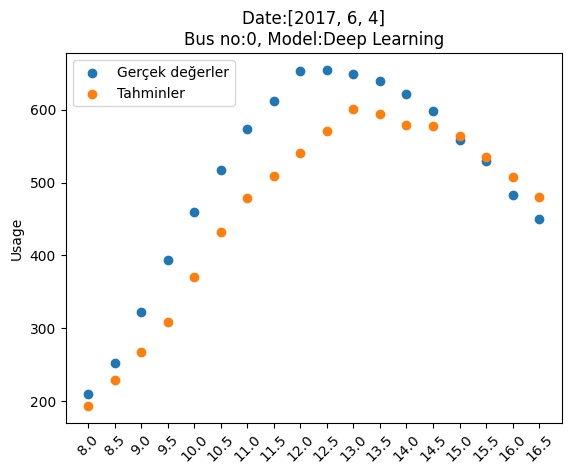

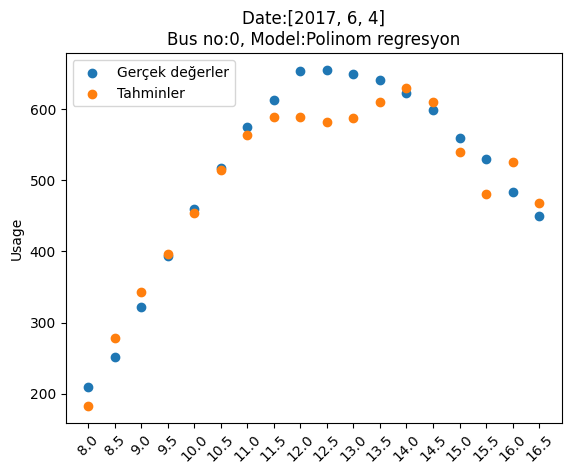

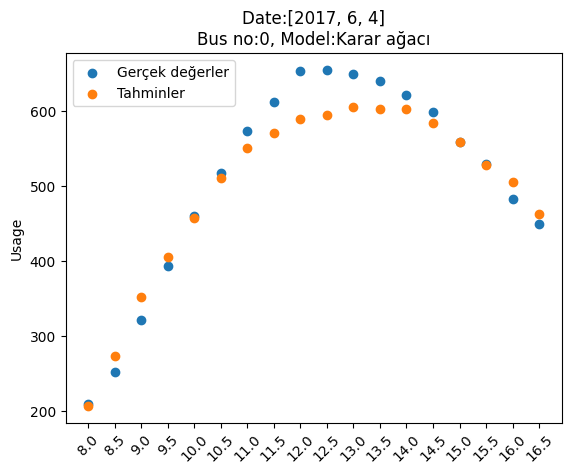

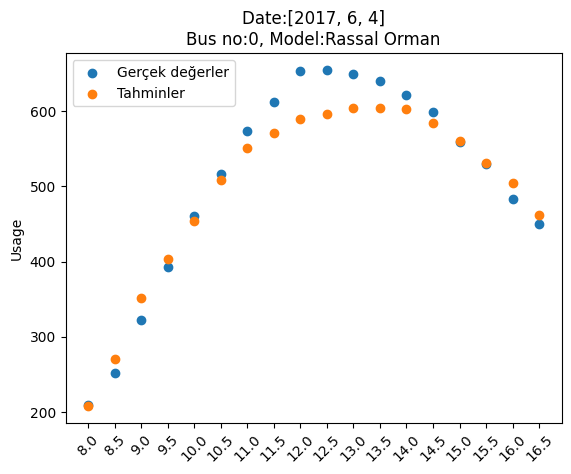

In [60]:
Plot_Compare(0)

In [61]:
#Bulunulan güncen itibaren önümüzdeki 7 gün için gün tablosu oluşturan bir fonksiyon tanımladım. 
#Bu tabloları modelin girişi ve çıkışı karşılaştırmak için kullanacağım.
def Day_creat():
    today=datetime.datetime.today()
    week_date=[]
    next_date=[]
    next_bus_id=[]
    next_period=[]
    next_capacity=[]
    for w in range(7):
        for b in range(10):
            
            period=np.arange(8,17,0.5).tolist()
            cap=capacity_list[b][1]
            for p in period:
                next_period.append(p)
                next_bus_id.append(b)
                next_capacity.append(cap)        
                week=today.weekday()
                week_date.append(week)
                today_date=today.strftime("%Y-%m-%d")
                next_date.append(today_date)
        today+=datetime.timedelta(days=1)
        
        
    df_week_date=pd.DataFrame(week_date,columns=["week_day"])   
    df_bus_id=pd.DataFrame(next_bus_id,columns=["bus_id"])  
    df_period=pd.DataFrame(next_period,columns=["period"])
    df_next_date=pd.DataFrame(next_date,columns=["Date"])
    df_capacity=pd.DataFrame(next_capacity,columns=["Kapasite"])
    x=pd.concat([df_week_date,df_bus_id,df_period],axis=1)
    x_table=pd.concat([df_next_date,df_bus_id,df_period,df_capacity],axis=1)
    
    return x,x_table
        
x,x_table=Day_creat()    

In [63]:
#Tahmin edilen değerle kapasiteyi karşılaştırmayı kolaylaştırmak için tahmini doluluk oranı hesaplamak 
#için bir fonksiyon tanımladım. 
def Ocupancy(pred_x,capacity):

    ocupancy=[]
    for k,x in enumerate(pred_x):
        percent=100-(((int(capacity[k])-int(x))/int(capacity[k]))*100)
        ocupancy.append(percent)
    return ocupancy    

In [64]:
#Önümüzdeki haftanın verilerini göndererek eğitilmiş tüm modelelrin tahminlerini değişkenlere tanımladım bu sayede 
#istenen model çağırılarak önümüzeki hafta hangi otobüste ne kadar doluluk olacağının tahmini gözlemlenip karşılaştırılabilir.
def Predict(x,x_table):
    
    y_dl_pred=Dl_pred(x)
    y_poly_pred=poly_pred(x)
    y_dtr_pred=dtr_pred(x)
    y_rfr_pred=rfr_pred(x)
    
    df_dl_pred=pd.DataFrame(y_dl_pred,columns=["Deep Learning Tahminleri"])
    df_poly_pred=pd.DataFrame(y_poly_pred,columns=["Polinom Regresyon Tahminleri"])    
    df_dtr_pred=pd.DataFrame(y_dtr_pred,columns=["Karar Ağacı Tahminleri"])
    df_rfr_pred=pd.DataFrame(y_rfr_pred,columns=["Rassal Orman Tahminleri"])
    
    
    
    pred_Dl=pd.concat([x_table,df_dl_pred],axis=1)
    pred_poly=pd.concat([x_table,df_poly_pred],axis=1)
    pred_dtr=pd.concat([x_table,df_dtr_pred],axis=1)
    pred_rfr=pd.concat([x_table,df_rfr_pred],axis=1)
    
    ocupancy_dl=Ocupancy(y_dl_pred,np.array(x_table[["Kapasite"]]))
    df_ocupancy_dl=pd.DataFrame(ocupancy_dl,columns=["Tahmini doluluk oranı"])
    pred_Dl=pd.concat([pred_Dl,df_ocupancy_dl],axis=1)
    
    ocupancy_poly=Ocupancy(y_poly_pred,np.array(x_table[["Kapasite"]]))
    df_ocupancy_poly=pd.DataFrame(ocupancy_poly,columns=["Tahmini doluluk oranı"])
    pred_poly=pd.concat([pred_poly,df_ocupancy_poly],axis=1)
    
    ocupancy_dtr=Ocupancy(y_dtr_pred,np.array(x_table[["Kapasite"]]))
    df_ocupancy_dtr=pd.DataFrame(ocupancy_dtr,columns=["Tahmini doluluk oranı"])
    pred_dtr=pd.concat([pred_dtr,df_ocupancy_dtr],axis=1)
    
    ocupancy_rfr=Ocupancy(y_rfr_pred,np.array(x_table[["Kapasite"]]))
    df_ocupancy_rfr=pd.DataFrame(ocupancy_rfr,columns=["Tahmini doluluk oranı"])
    pred_rfr=pd.concat([pred_rfr,df_ocupancy_rfr],axis=1)
    
    return pred_Dl,pred_poly,pred_dtr,pred_rfr


In [65]:
Deep_learn_pred,Poly_reg_pred,Decision_tree_pred,Random_fores_pred=Predict(x, x_table);

40/40 [==============================] - 0s 2ms/step


In [69]:
Deep_learn_pred.head(20)

,Date,bus_id,period,Kapasite,Deep Learning Tahminleri,Tahmini doluluk oranı
0,2022-12-05,0,8.0,2813,238.089005,8.460718
1,2022-12-05,0,8.5,2813,282.102753,10.024884
2,2022-12-05,0,9.0,2813,326.116577,11.589051
3,2022-12-05,0,9.5,2813,376.797028,13.366513
4,2022-12-05,0,10.0,2813,420.760223,14.930679
5,2022-12-05,0,10.5,2813,463.972687,16.459296
6,2022-12-05,0,11.0,2813,510.018829,18.130110
7,2022-12-05,0,11.5,2813,547.440918,19.445432
8,2022-12-05,0,12.0,2813,572.474426,20.334163
9,2022-12-05,0,12.5,2813,596.759644,21.187344


In [70]:
Poly_reg_pred.head(20)

,Date,bus_id,period,Kapasite,Polinom Regresyon Tahminleri,Tahmini doluluk oranı
0,2022-12-05,0,8.0,2813,268.001024,9.527195
1,2022-12-05,0,8.5,2813,326.935570,11.589051
2,2022-12-05,0,9.0,2813,386.690375,13.722005
3,2022-12-05,0,9.5,2813,447.537159,15.890508
4,2022-12-05,0,10.0,2813,507.245771,18.023462
5,2022-12-05,0,10.5,2813,561.215265,19.943121
6,2022-12-05,0,11.0,2813,604.051177,21.471738
7,2022-12-05,0,11.5,2813,632.166149,22.467117
8,2022-12-05,0,12.0,2813,646.242520,22.964806
9,2022-12-05,0,12.5,2813,651.959257,23.142552


In [71]:
Decision_tree_pred.head(20)

,Date,bus_id,period,Kapasite,Karar Ağacı Tahminleri,Tahmini doluluk oranı
0,2022-12-05,0,8.0,2813,249.500,8.851760
1,2022-12-05,0,8.5,2813,313.125,11.126911
2,2022-12-05,0,9.0,2813,398.750,14.148596
3,2022-12-05,0,9.5,2813,459.500,16.317099
4,2022-12-05,0,10.0,2813,525.250,18.663349
5,2022-12-05,0,10.5,2813,566.250,20.120867
6,2022-12-05,0,11.0,2813,604.250,21.471738
7,2022-12-05,0,11.5,2813,623.500,22.147174
8,2022-12-05,0,12.0,2813,642.000,22.822609
9,2022-12-05,0,12.5,2813,656.500,23.320299


In [73]:
Random_fores_pred.head(20)

,Date,bus_id,period,Kapasite,Rassal Orman Tahminleri,Tahmini doluluk oranı
0,2022-12-05,0,8.0,2813,249.955681,8.851760
1,2022-12-05,0,8.5,2813,313.195611,11.126911
2,2022-12-05,0,9.0,2813,399.919572,14.184145
3,2022-12-05,0,9.5,2813,459.721300,16.317099
4,2022-12-05,0,10.0,2813,523.602677,18.592250
5,2022-12-05,0,10.5,2813,565.112906,20.085318
6,2022-12-05,0,11.0,2813,603.925357,21.436189
7,2022-12-05,0,11.5,2813,623.126172,22.147174
8,2022-12-05,0,12.0,2813,641.925600,22.787060
9,2022-12-05,0,12.5,2813,655.856603,23.284749
